In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

## Question 1:
It costs a company \\$12 to purchase an hour of labor and \\$15 to purchase an hour of capital. If L hours of labor and K units of capital are available, then $0.05L^{2/3}K^{1/3}$ machines can be produced. Suppose the company has \\$100,000 to purchase labor and capital. What is the maximum number of machines it can produce? Round to the nearest whole number of machines.

In [2]:
def obj(xy):
    return  -(0.05*xy[0]**(2/3) * xy[1]**(1/3))

In [3]:
def confun(x):
    return  -12*x[0] - 15 * x[1] + 100000 

In [4]:
constr1 = {'type':'ineq', 'fun': confun} 
constraints = [constr1]

In [5]:
machine_number = minimize(obj,[10,10],constraints=constraints)

In [6]:
round(-machine_number.fun)

205

## Question 2:
The file (homework4stocks.csv) contains historical monthly returns for 27 companies. The first row contains stock names, and the first column contains the dates. For each company, calculate the estimated mean return and the estimated variance of return. Then calculate the estimated covariances between the companies' returns. Find a portfolio that achieves an expected monthly return of at least 1% and minimizes portfolio variance.  Assume no short selling is allowed. What is the portfolio's standard deviation?  Round to 2 decimal places?  Answer in terms of absolute numbers.  If your answer is 8% then you should enter 0.08.

 

We may or may not get to the content for this problem before it's due.  If we don't then don't worry about it.

### I did not due. I tried, it did not go well. I'll sit down to understand it later once the solution is posted.

## Question 3:

The file (variable_selection.csv) contains observations of variables $y, x_1, x_2,$ and $x_3$. Here, y is the dependent variable. We want to choose a linear model that uses at most two independent variables such that the sum of squared residuals is minimized. This can be formulated as a constrained quadratic programming problem.

$min \sum_{i+1}^{n}(\beta_0 + \beta_1x_{1i} + \beta_2x_{2i} + \beta_3x_{3i} - y_i)^2$ 

s.t. At most 2 of $\beta_1, \beta_2, \beta_3$ are non-zero.

This is called best subset problem that is usually very hard to solve. We will solve this problem by enumeration. Run six OLS regressions (3 with one independent variable and three more with two variables each) and choose the regression that best fits the data. You can run each regression in R using the LM routine. 

 

Which variables are included?

In [7]:
selection = pd.read_csv('variable_selection.csv')

In [8]:
combos = [['x1'],['x2'],['x3'],['x1', 'x2'], ['x1', 'x3'], ['x2', 'x3']]
best = []

for z in combos:
    y = selection['y']
    x = selection[z]
    
    model = LinearRegression()
    model.fit( x, y)
    error = np.sum((model.predict(x) - y)**2)
    
    best.append(error)

In [9]:
least = best.index(min(best))
combos[least]

['x1', 'x2']

## Question 4:

The file (nflratings.csv) contains the results of 256 regular-season NFL games from the 2009 season. The teams are indexed 1 to 32 as shown below:

The csv data file contains a matrix with the following columns:

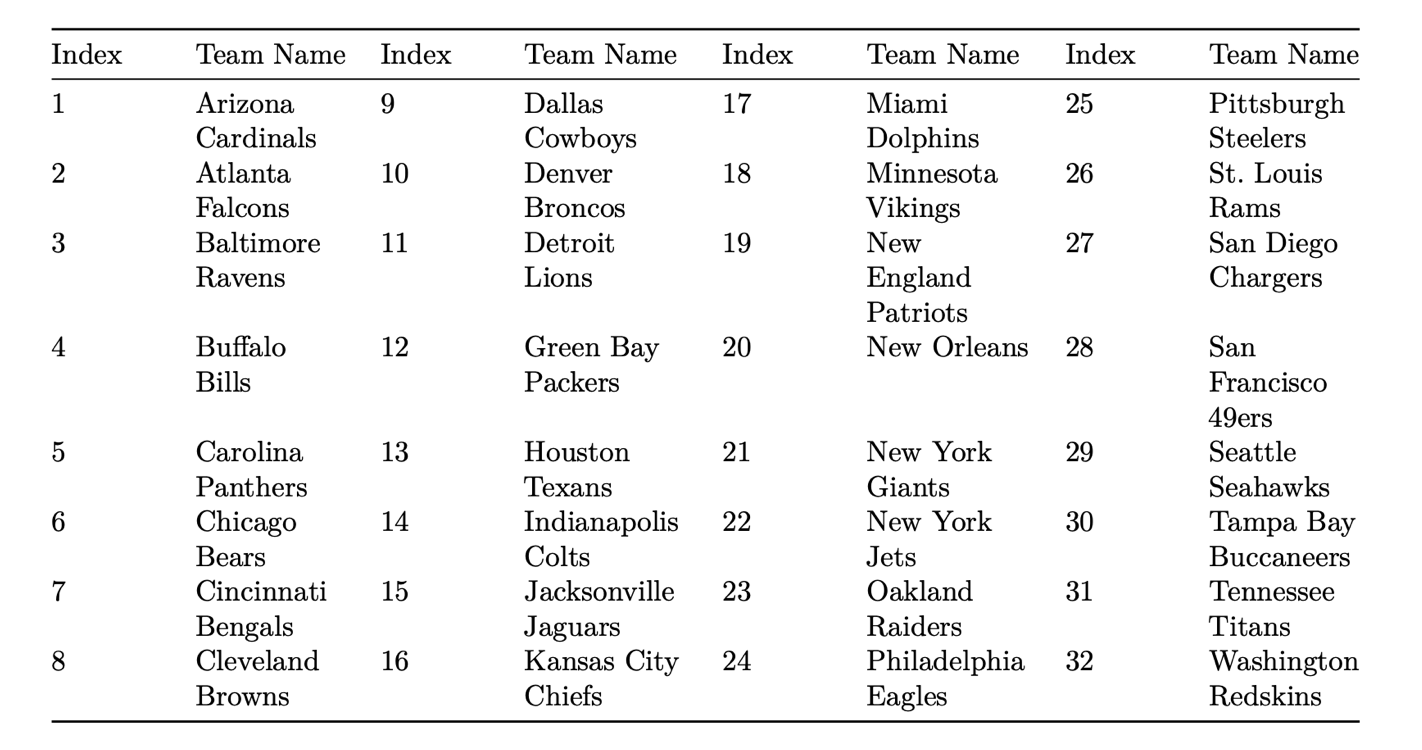

In [59]:
from IPython.display import Image
img = 'Question 4 img.png'
Image(filename=img)

• Week (1-17)

• Home Team Index (1-32 from the table above)

• Visiting Team Index (1-32 from the table above)

• Home Team Score

• Visiting Team Score

For example, the first game in the matrix is team 25 Pittsburgh versus team 31 Tennessee, played at Pittsburgh. Pittsburgh won the game by a score of 13 to 10, and the point spread (home team score minus visitor team score) is 3. A positive point spread means that the home team won; a negative point spread indicates that the visiting team won.

The goal of this problem is to determine a set of ratings for the 32 NFL teams that most accurately predicts the actual outcomes of the games played, similar to homework 1. Here however, we will also incorporate a 'home field advantage' that adds some number of points to the predicted point spread.  Use NLP to find the ratings that best predict the actual point spreads observed. The model will estimate the home team advantage and the ratings.  The model accounts for the home team advantage by adding a constant (which you need to solve for) to the predicted point spread.  The objective is to minimize the sum of squared prediction errors. You will need to calculate the following:

• Actual Point Spread = Home Team Score – Visiting Team Score

• Predicted Spread = Home Team Rating – Visitor Team Rating + Home Team Advantage

• Prediction error = Actual Point Spread – Predicted Point Spread

Your goal is to minimize: $\sum_{game=1}^{256}prediction$ $  error^2_{game}$

You will also need to normalize the ratings (like you did in HW1). To do this, you set the actual average of the ratings to be 85 (this is somewhat arbitrary but based on the well-known Sagarin rating system). What do these ratings mean: If two teams had ratings of 82 and 91, then the second team would be predicted to win by 9 points if the game was played on a neutral field. 

Formulate this as an NLP and solve it.

How many games (of the 256 played) does this model predict the winner correctly?

In [10]:
games = pd.read_csv('nflratings.csv', header = None, names = ['Week', 'Home Index', 'Visiting Index', 'Home Score','Visiting Score'])
games

,Week,Home Index,Visiting Index,Home Score,Visiting Score
0,1,25,31,13,10
1,1,2,17,19,7
2,1,29,26,28,0
3,1,21,32,23,17
4,1,3,16,38,24
...,...,...,...,...,...
251,17,5,20,23,10
252,17,11,6,23,37
253,17,22,6,37,0
254,17,8,15,23,17


In [11]:
games['Actual Spread'] = 0
for x in range(0,256):
    games['Actual Spread'].values[x] = games['Home Score'][x] - games['Visiting Score'][x]

In [12]:
def obj(xy): # predicted spread
    # xy[0] is home team radvantage
    # xy[1] is home team rating
    # xy[2] is visiting team rating
    sum_pred_error = 0 
    for x in range(len(games)):
        pred_spread = xy[games['Home Index'].iloc[x]] - xy[games['Visiting Index'].iloc[x]] +xy[0] 
        pred_error = games['Actual Spread'].iloc[x] - pred_spread
        sum_pred_error = sum_pred_error + (pred_error**2)
    return  sum_pred_error

In [13]:
NLP = minimize(obj,[0]+[85]*32,bounds=[(0,100)]*33,method='BFGS')

/Users/user/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minimize.py:538: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,


In [14]:
home_adv = NLP.x[0]
rating = NLP.x[1:].tolist()

pred_spread = []
for x in range(len(games)):
    pred_spread.append(rating[games['Home Index'].iloc[x]-1] - rating[games['Visiting Index'].iloc[x]-1] + home_adv)
    
games['Predicted Spread'] = pred_spread
games['Correct Prediction'] = (games['Actual Spread'] * games['Predicted Spread']) > 0

In [15]:
sum(games['Correct Prediction'])

181